___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
data = pd.read_csv('advertising.csv')


**Check the head of ad_data**

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [16]:
data.describe() 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

(array([  6.,   6.,   6.,  13.,  19.,  21.,   0.,  27.,  37.,  33.,  48.,
         48.,   0.,  39.,  60.,  38.,  43.,  39.,   0.,  39.,  50.,  36.,
         37.,  30.,   0.,  36.,  32.,  26.,  23.,  21.,  30.,   0.,  18.,
         13.,  16.,  18.,  20.,   0.,  12.,  15.,  10.,   9.,   7.,   0.,
          2.,   6.,   4.,   2.,   4.,   1.]),
 array([ 19.  ,  19.84,  20.68,  21.52,  22.36,  23.2 ,  24.04,  24.88,
         25.72,  26.56,  27.4 ,  28.24,  29.08,  29.92,  30.76,  31.6 ,
         32.44,  33.28,  34.12,  34.96,  35.8 ,  36.64,  37.48,  38.32,
         39.16,  40.  ,  40.84,  41.68,  42.52,  43.36,  44.2 ,  45.04,
         45.88,  46.72,  47.56,  48.4 ,  49.24,  50.08,  50.92,  51.76,
         52.6 ,  53.44,  54.28,  55.12,  55.96,  56.8 ,  57.64,  58.48,
         59.32,  60.16,  61.  ]),
 <a list of 50 Patch objects>)

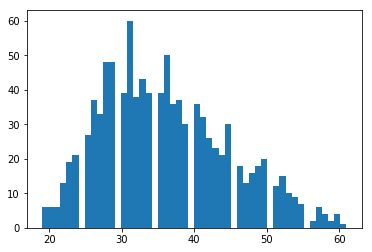

In [18]:
plt.hist(x='Age',data=data,bins=50)

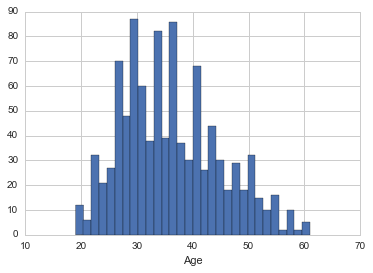

**Create a jointplot showing Area Income versus Age.**

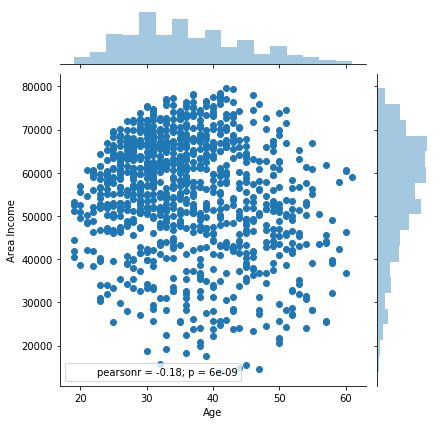

In [19]:
sns.jointplot(x='Age',y='Area Income',data=data)

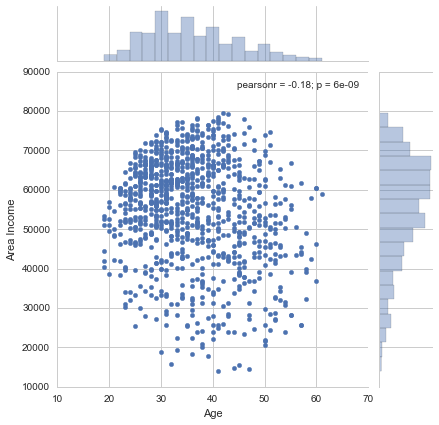

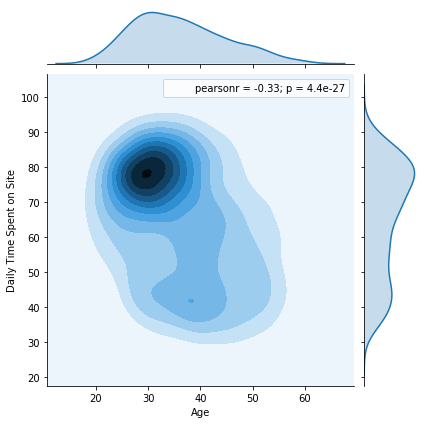

In [24]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data,kind='kde')

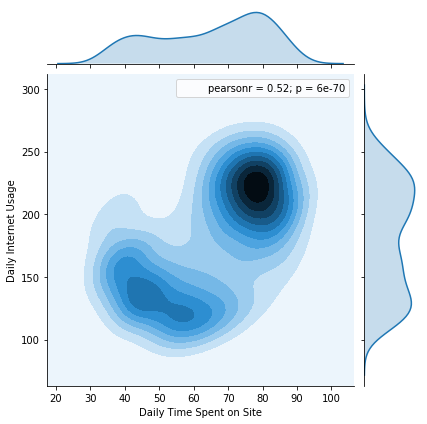

In [30]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,kind='kde')

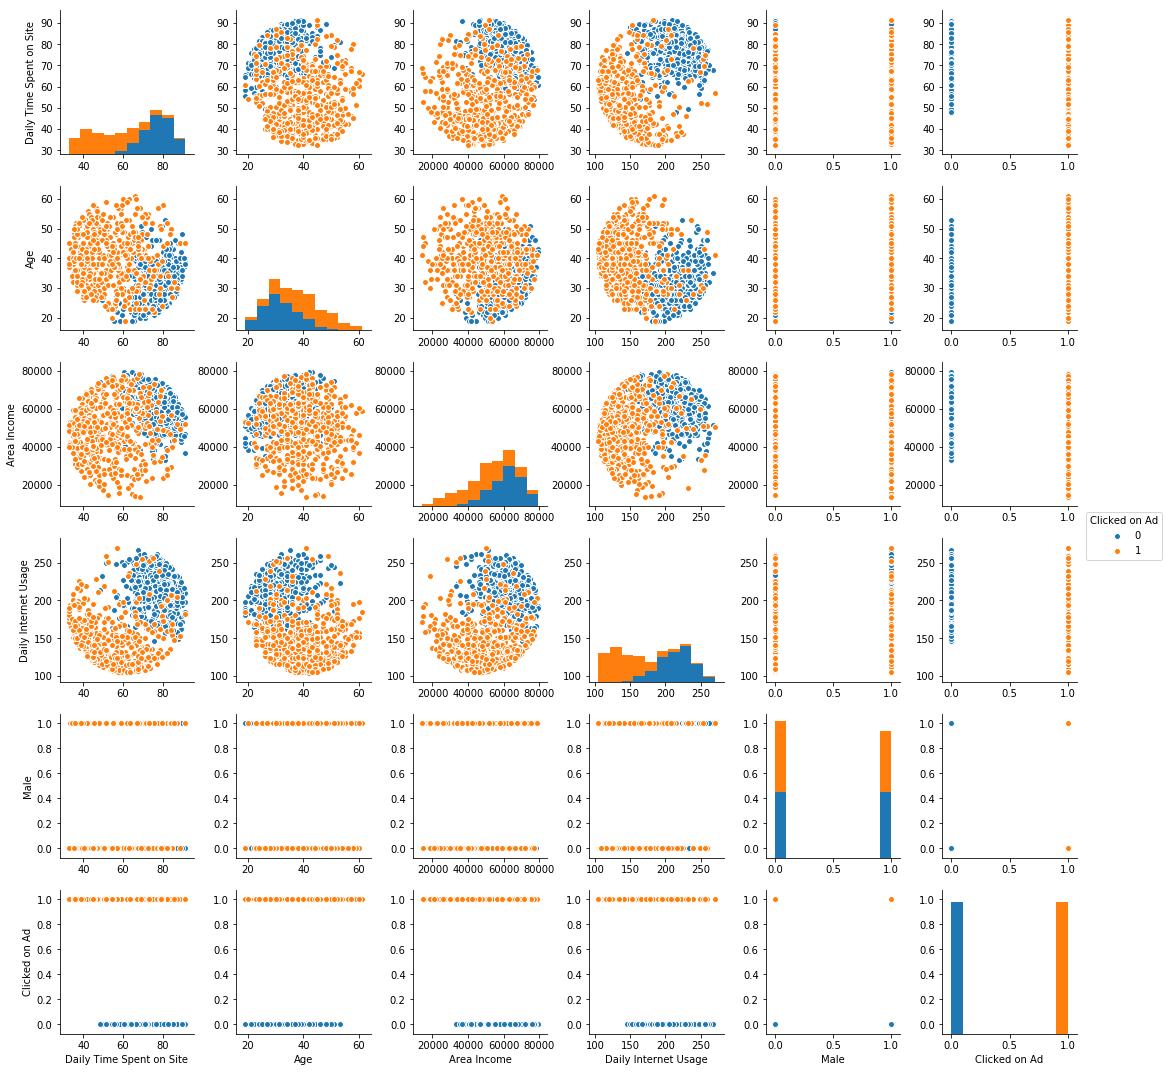

In [32]:
sns.pairplot(data,hue='Clicked on Ad')


data.head(1)

In [43]:
data.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [47]:
X = data.drop(['Clicked on Ad','Timestamp','Country','City','Ad Topic Line'],axis=1)
y = data['Clicked on Ad']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [49]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
pred = lm.predict(X_test)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300

[[149   8]
 [ 15 128]]


** Create a classification report for the model.**

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job!